In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')

**Section 1: Data Exploration (EDA)**


1.1 Loading the Data


1.  Load the dataset using Pandas.


In [80]:
cars_price = pd.read_csv("/content/cars_price.csv")


2.  Display the first five rows of the dataset.


In [81]:
cars_price.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450


3.  Check for missing values in each column.


In [82]:
cars_price.isnull().sum()

,0
symboling,3044
normalized-losses,3036
make,3102
fuel-type,3021
aspiration,2975
num-of-doors,3009
body-style,3004
drive-wheels,3115
engine-location,2978
wheel-base,3066


In [83]:
cars_price.duplicated().sum()

np.int64(4456)

In [84]:
cars_price.shape

(30330, 26)

In [85]:
cars_price.drop_duplicates(inplace=True)
#cars_price.to_csv('cars_price.csv', index=False)

In [86]:
cars_price.shape

(25874, 26)

In [90]:
cars_price['price'].isnull().sum()

np.int64(2913)

4.  What are the data types of each column? Identify numerical and categorical features.


In [91]:
cars_price.select_dtypes(include="object").columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [92]:
cars_price.select_dtypes(include="float64").columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

1.2 Statistical Summary and Distributions


5. .describe() function give us mean, standard deviation and percentage of data. We can guess columns with normal and skewed distribution.


In [94]:
cars_price.describe(include='float64')

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,22961.000000,22930.000000,22921.000000,23054.000000,22934.000000,22977.000000,22944.000000,23007.000000,22916.000000,22972.000000
mean,0.842516,98.812290,174.168317,65.920114,53.733034,2560.221265,127.322394,10.121975,25.148543,30.700200
std,1.244124,6.044476,12.384015,2.148439,2.435949,521.624698,41.817912,3.941974,6.536613,6.883403
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


6.  Plot histograms for numerical features. What do you observe?

Ans. It shows that features like symboling, length and height are almost normally distributed while others are skewed.

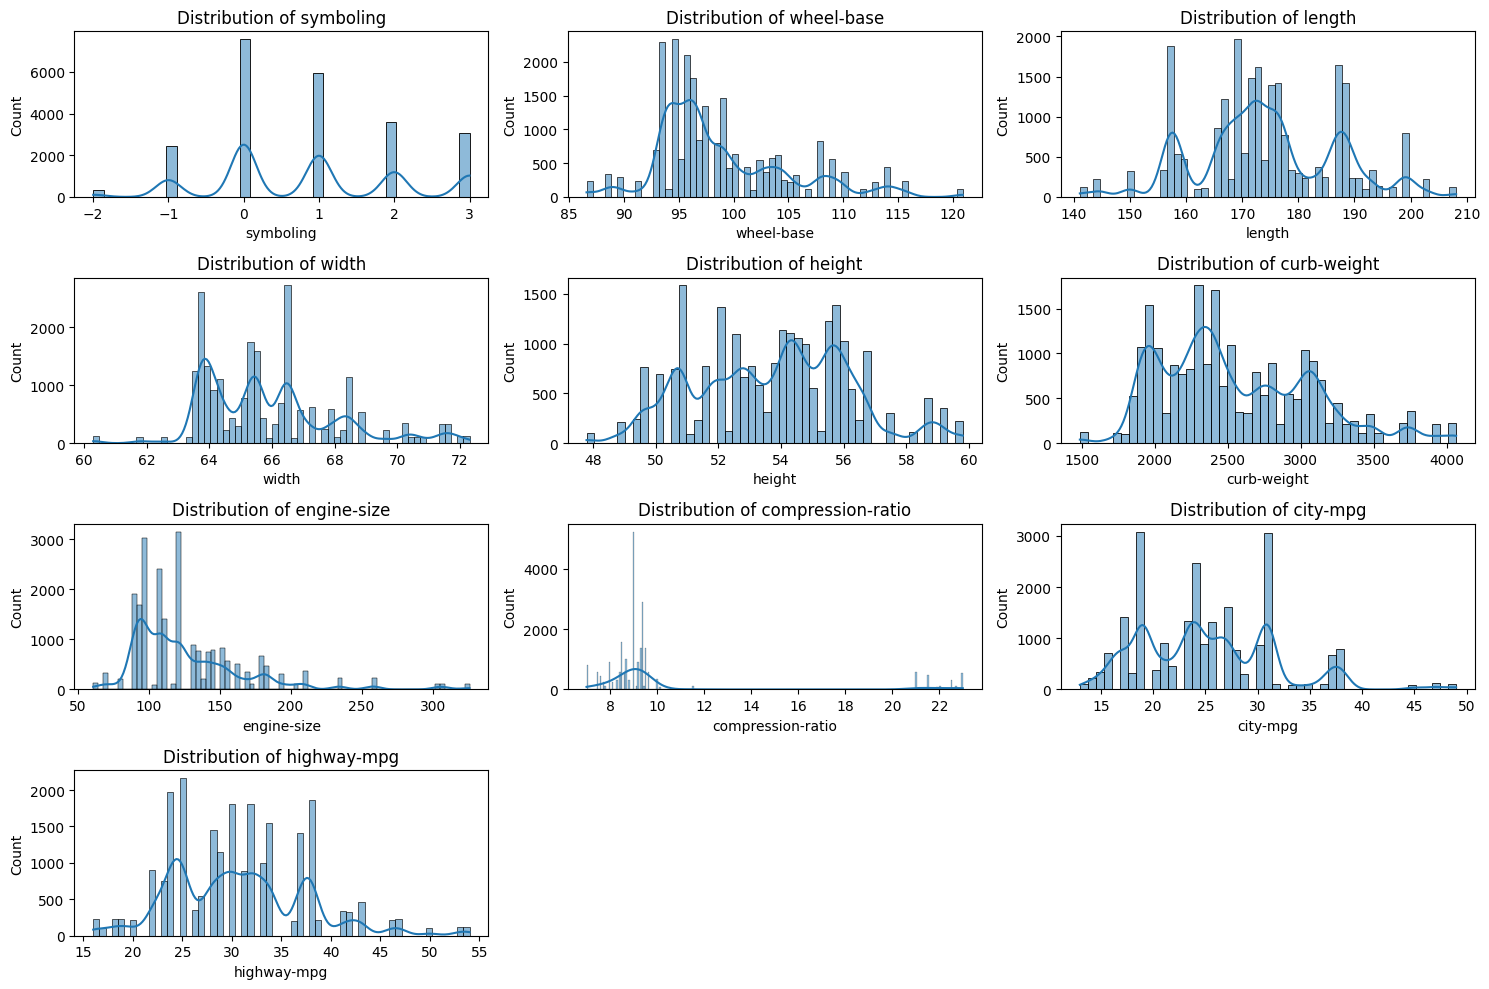

In [95]:
plt.figure(figsize=(15,10))

for index,col in enumerate(cars_price.select_dtypes(include="number").columns):
  #plt.subplot(1,6,index+1)
  plt.subplot(4,3,index+1)
  sns.histplot(cars_price[col],kde=True)

  #sns.histplot(data[col],kde=True)
  plt.title(f"Distribution of {col}")

  plt.tight_layout()

7. boxplot shows outliers if present in the numerical features.

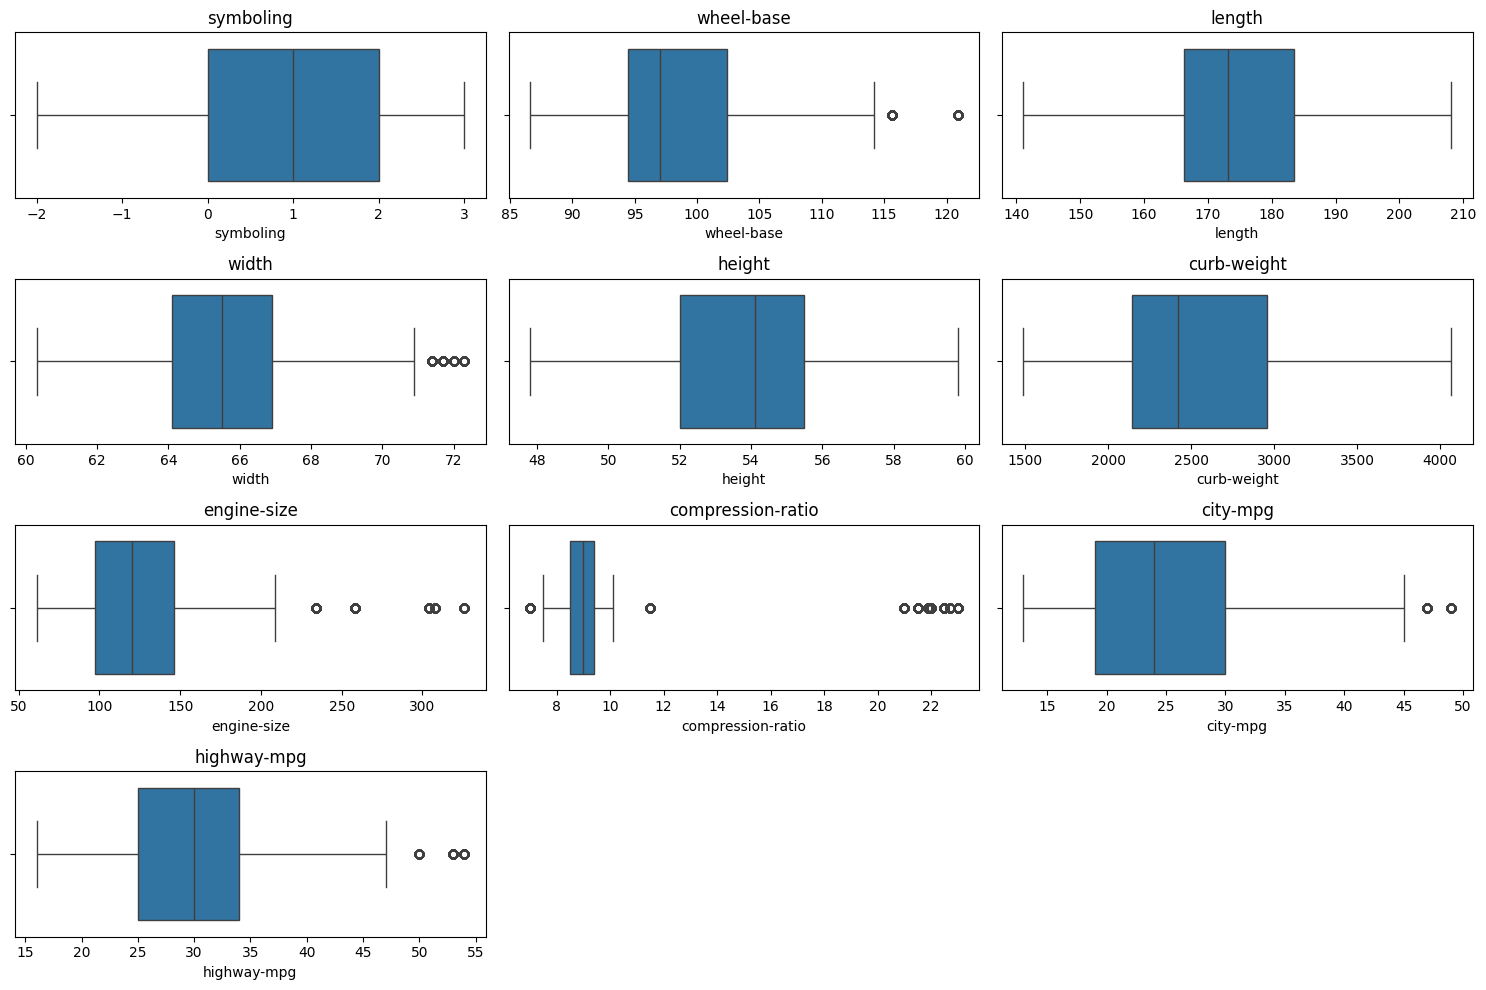

In [96]:
plt.figure(figsize=(15,10))

for i,colum in enumerate(cars_price.select_dtypes(include="number").columns):

  plt.subplot(4,3,i+1)
  sns.boxplot(x=cars_price[colum])
  plt.title(colum)


plt.tight_layout()

1.3 Relationships Between Features


In [98]:
cars_price['price'].value_counts()

,count
price,
?,482
18150,252
16500,231
8495,228
6692,224
...,...
32528,95
7099,95
5399,94


In [99]:
print("Empty strings:", (cars_price['price'] == '').sum())
print("'?' values:", (cars_price['price'] == '?').sum())
print("NaN values:", cars_price['price'].isna().sum())

Empty strings: 0
'?' values: 482
NaN values: 2913


In [100]:
cars_price[cars_price['price'].notna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30324,0.0,102,subaru,gas,std,NaN,sedan,4wd,front,97.0,...,108.0,2bbl,3.62,2.64,9.0,82,4800,24.0,NaN,9233
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


In [101]:
cars_price['price'].value_counts()

,count
price,
?,482
18150,252
16500,231
8495,228
6692,224
...,...
32528,95
7099,95
5399,94


In [102]:
cars_price['price'] = cars_price['price'].replace('?', np.nan)
cars_price['price'] = pd.to_numeric(cars_price['price'], errors='coerce')

In [103]:
cars_price['price'].value_counts()

,count
price,
18150.0,252
16500.0,231
8495.0,228
6692.0,224
9279.0,223
...,...
32528.0,95
7099.0,95
5399.0,94


8. Heatmap shows how much different feature are correlated to each other and the target variable. Features like engine-size and curb-weight have high correlation than all others.

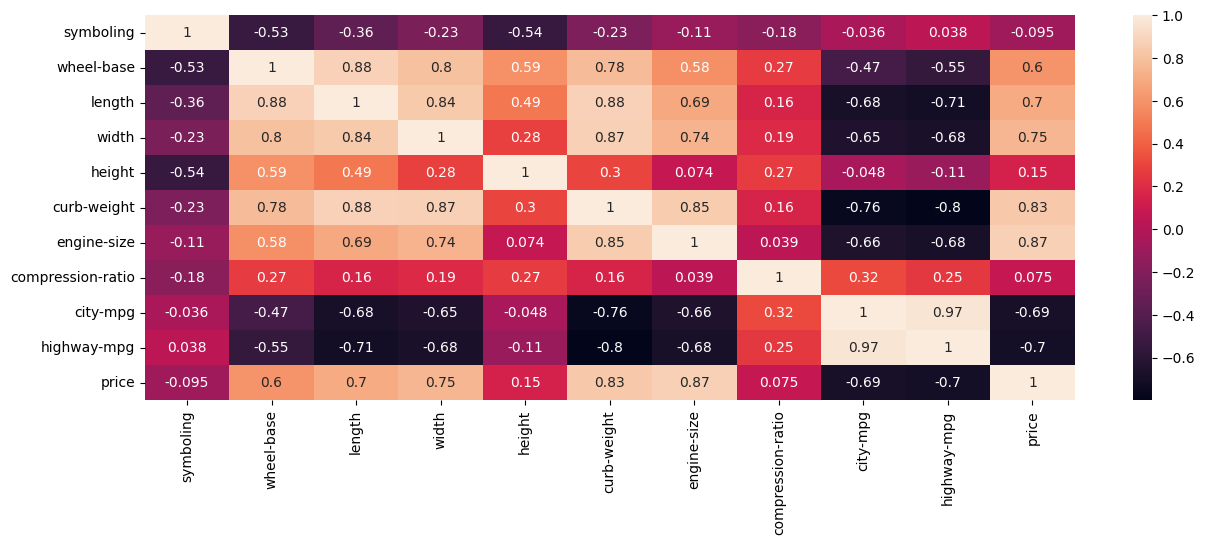

In [104]:
plt.figure(figsize=[15,5])
sns.heatmap(cars_price.corr(numeric_only=True),annot=True)
plt.show()

9.  Using a pivot table, find the average price for different fuel types.


In [105]:
pivot_table = cars_price.pivot_table(values='price', index='fuel-type', aggfunc='mean')
print(pivot_table)

                  price
fuel-type              
diesel     16027.305955
gas        12935.698966


10. Use groupby() to analyze the average price for different car brands.


In [106]:
brand_avg_price = cars_price.groupby('make')['price'].mean().sort_values(ascending=False)
print(brand_avg_price)


make
jaguar           34395.348837
mercedes-benz    33644.818182
porsche          31118.758808
bmw              26753.765356
volvo            18180.582852
audi             17822.084063
mercury          16503.000000
alfa-romero      15547.920792
peugot           15422.239819
saab             15317.619808
mazda            10631.494991
nissan           10576.102535
toyota           10043.539949
volkswagen       10016.127410
renault           9554.375000
mitsubishi        9184.194611
isuzu             8999.276699
subaru            8607.018730
honda             8218.807784
plymouth          8099.460526
dodge             7906.300341
chevrolet         5984.047923
Name: price, dtype: float64


11. How does body style impact car price? Use suitable plots and analysis.


In [107]:
avg_price_by_body = cars_price.groupby('body-style')['price'].mean().sort_values(ascending=False)
print(avg_price_by_body)

body-style
hardtop        22373.444740
convertible    21191.535473
sedan          14515.262915
wagon          12501.266693
hatchback      10006.055089
Name: price, dtype: float64


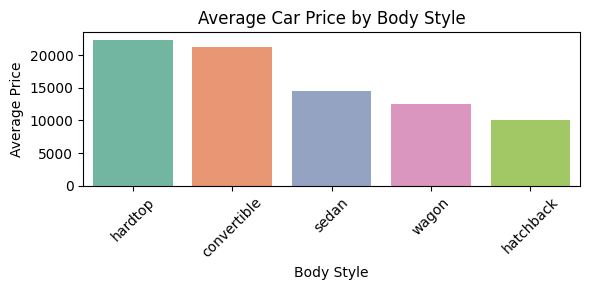

In [108]:
plt.figure(figsize=(6,3))
sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values, palette='Set2')
plt.title('Average Car Price by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12. Which type of engine (engine-type) is most commonly used? Represent this with a bar


In [109]:
engine_counts = cars_price['engine-type'].value_counts()
print(engine_counts)


engine-type
ohc      16472
ohcf      1676
ohcv      1460
dohc      1401
l         1393
rotor      441
dohcv      119
Name: count, dtype: int64


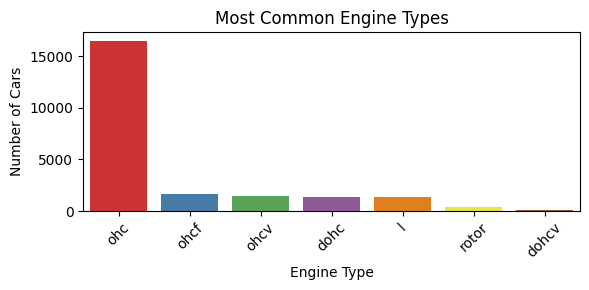

In [110]:
plt.figure(figsize=(6,3))
sns.barplot(x=engine_counts.index, y=engine_counts.values, palette="Set1")
plt.title('Most Common Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Section 2: Data Preprocessing**


13. Identifying Nulls in the Dataset cars_price

In [111]:
cars_price.isnull().sum()

,0
symboling,2913
normalized-losses,2921
make,2969
fuel-type,2892
aspiration,2843
num-of-doors,2903
body-style,2875
drive-wheels,2990
engine-location,2850
wheel-base,2944


14. Percentage of Nulls in all columns

In [112]:
null_percentage = (cars_price.isnull().sum()/len(cars_price) )*100
null_percentage.sort_values(ascending = False)

,0
price,13.121280
horsepower,11.695138
drive-wheels,11.556002
make,11.474840
city-mpg,11.432326
length,11.413001
wheel-base,11.378218
fuel-system,11.378218
height,11.362758
engine-size,11.324109


In [113]:
col_values_all = cars_price.select_dtypes(exclude=['int', 'float'])
for col in col_values_all.columns:
    print(col_values_all.loc[0:1, col])
    print(col_values_all[col].value_counts())
    print("___________________________________________")

0    NaN
1      ?
Name: normalized-losses, dtype: object
normalized-losses
?      4660
161    1294
91      870
150     800
104     710
134     678
128     645
102     606
94      570
85      557
65      546
95      538
168     535
103     529
74      514
93      468
106     459
122     435
148     434
118     413
125     346
137     338
83      325
154     322
115     318
101     311
197     248
153     242
188     238
145     236
113     233
119     232
108     232
81      230
194     228
110     227
129     225
89      214
87      209
158     207
164     205
192     198
121     126
256     125
77      123
90      114
142     113
186     112
231     110
98      107
78      102
107      96
Name: count, dtype: int64
___________________________________________
0    alfa-romero
1    alfa-romero
Name: make, dtype: object
make
toyota           3568
nissan           1956
mazda            1904
mitsubishi       1521
honda            1396
subaru           1377
volkswagen       1356
peugot      

14. What strategy will you use to handle missing numerical values? (Mean/Median/Mode)


By analyzing the distribution of the numerical features first, some features are normally distributed, I’d use the mean. some of them are skewed or has outliers, I’d go with the median. Mode is rarely used for numerical data, but I might consider it for discrete numeric categories.

In [114]:
cars_price['symboling'].value_counts()

,count
symboling,
0.0,7566
1.0,5965
2.0,3586
3.0,3092
-1.0,2436
-2.0,316


In [115]:
cars_price.drop('symboling', axis=1, inplace=True) # Correlattion is very low to price, thats why removed

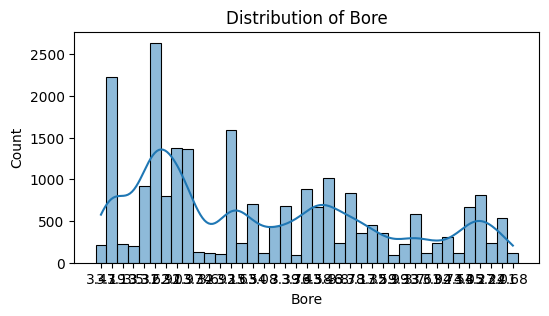

In [116]:
plt.figure(figsize=(6,3))
sns.histplot(x=cars_price['bore'], kde=True)
plt.title('Distribution of Bore')
plt.xlabel('Bore')
plt.show()

In [117]:
cars_price['bore'].value_counts()

,count
bore,
3.62,2639
3.19,2231
3.15,1595
3.03,1376
2.97,1359
3.46,1020
3.31,920
3.43,889
3.78,834


In [118]:
# Since bore is my cat. column, i would mode it
cars_price['bore'] = cars_price['bore'].replace('?', np.nan)

cars_price['bore'] = cars_price['bore'].fillna(cars_price['bore'].mode()[0])

In [119]:
cars_price['bore'].value_counts()

,count
bore,
3.62,5921
3.19,2231
3.15,1595
3.03,1376
2.97,1359
3.46,1020
3.31,920
3.43,889
3.78,834


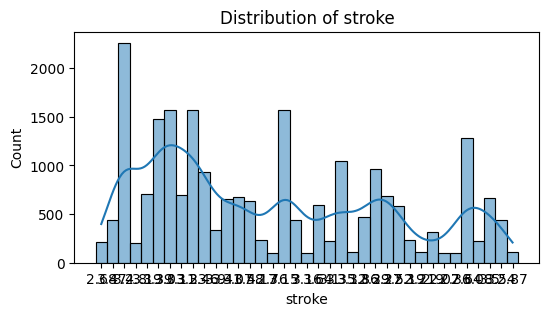

In [120]:
plt.figure(figsize=(6,3))
sns.histplot(x=cars_price['stroke'], kde=True)
plt.title('Distribution of stroke')
plt.xlabel('stroke')
plt.show()

In [121]:
cars_price['stroke'].value_counts()

,count
stroke,
3.4,2261
3.15,1567
3.03,1566
3.23,1565
3.39,1473
2.64,1279
3.35,1043
3.29,968
3.46,932


In [122]:
cars_price['stroke'] = cars_price['stroke'].replace('?', np.nan)

cars_price['stroke'] = cars_price['stroke'].fillna(cars_price['stroke'].mode()[0])

In [123]:
cars_price['stroke'].value_counts()

,count
stroke,
3.4,5513
3.15,1567
3.03,1566
3.23,1565
3.39,1473
2.64,1279
3.35,1043
3.29,968
3.46,932


In [124]:
cars_price['horsepower'].value_counts()

,count
horsepower,
68,2141
70,1209
69,1056
116,1019
110,876
95,793
160,692
88,688
62,673


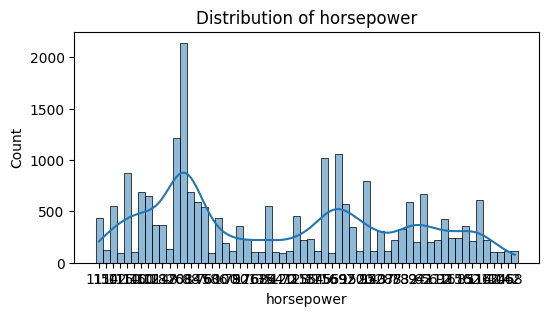

In [125]:
plt.figure(figsize=(6,3))
sns.histplot(x=cars_price['horsepower'], kde=True)
plt.title('Distribution of horsepower')
plt.xlabel('horsepower')
plt.show()

In [126]:
cars_price['horsepower'] = cars_price['horsepower'].replace('?', np.nan)

cars_price['horsepower'] = cars_price['horsepower'].fillna(cars_price['horsepower'].mode()[0])

In [127]:
cars_price['horsepower'].value_counts()

,count
horsepower,
68,5387
70,1209
69,1056
116,1019
110,876
95,793
160,692
88,688
62,673


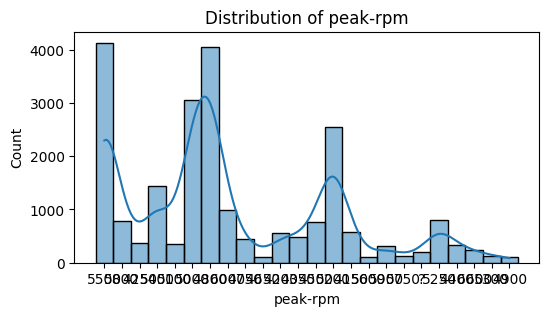

In [128]:
plt.figure(figsize=(6,3))
sns.histplot(x=cars_price['peak-rpm'], kde=True)
plt.title('Distribution of peak-rpm')
plt.xlabel('peak-rpm')
plt.show()

In [129]:
cars_price['peak-rpm'].value_counts()

,count
peak-rpm,
5500,4133
4800,4060
5000,3061
5200,2549
5400,1448
6000,986
5250,809
5800,778
4500,764


In [130]:
cars_price['peak-rpm'] = cars_price['peak-rpm'].replace('?', np.nan)

cars_price['peak-rpm'] = cars_price['peak-rpm'].fillna(cars_price['peak-rpm'].mode()[0])

In [131]:
cars_price['peak-rpm'].value_counts()

,count
peak-rpm,
5500,7216
4800,4060
5000,3061
5200,2549
5400,1448
6000,986
5250,809
5800,778
4500,764


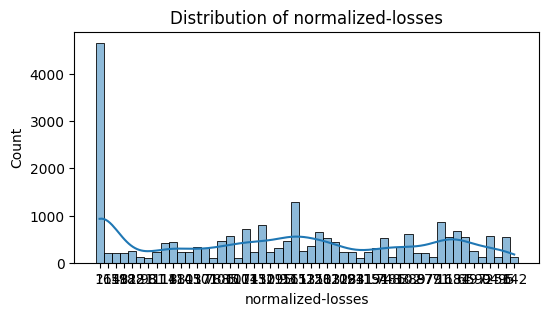

In [132]:
plt.figure(figsize=(6,3))
sns.histplot(x=cars_price['normalized-losses'], kde=True)
plt.title('Distribution of normalized-losses')
plt.xlabel('normalized-losses')
plt.show()

In [133]:
cars_price['normalized-losses'].value_counts()

,count
normalized-losses,
?,4660
161,1294
91,870
150,800
104,710
134,678
128,645
102,606
94,570


In [134]:

cars_price['normalized-losses'] = cars_price['normalized-losses'].replace('?', np.nan)

cars_price['normalized-losses'] = cars_price['normalized-losses'].fillna(cars_price['normalized-losses'].mode()[0])

In [135]:
cars_price['normalized-losses'].value_counts()

,count
normalized-losses,
161,8875
91,870
150,800
104,710
134,678
128,645
102,606
94,570
85,557


In [136]:
cars_price.isnull().sum()

,0
normalized-losses,0
make,2969
fuel-type,2892
aspiration,2843
num-of-doors,2903
body-style,2875
drive-wheels,2990
engine-location,2850
wheel-base,2944
length,2953


In [137]:

print("NaN values:", cars_price.isna().sum())

NaN values: normalized-losses       0
make                 2969
fuel-type            2892
aspiration           2843
num-of-doors         2903
body-style           2875
drive-wheels         2990
engine-location      2850
wheel-base           2944
length               2953
width                2820
height               2940
curb-weight          2897
engine-type          2912
num-of-cylinders     2921
engine-size          2930
fuel-system          2944
bore                    0
stroke                  0
compression-ratio    2867
horsepower              0
peak-rpm                0
city-mpg             2958
highway-mpg          2902
price                3395
dtype: int64


In [138]:
cars_price['num-of-doors'].value_counts()

,count
num-of-doors,
four,12819
two,9932
?,220


In [139]:
# changing ? values in this column to four won't have any difference
cars_price['num-of-doors'] = cars_price['num-of-doors'].replace('?', 'four')

In [140]:
cars_price['num-of-doors'].value_counts()

,count
num-of-doors,
four,13039
two,9932


In [141]:
categorical_cols = [
    'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
    'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'
]

for col in categorical_cols:
    mode_val = cars_price[col].mode()[0]
    cars_price[col] = cars_price[col].fillna(mode_val)


In [142]:
numeric_cols = [
    'wheel-base', 'width', 'curb-weight',
    'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'
]

for col in numeric_cols:
    median_val = cars_price[col].median()
    cars_price[col] = cars_price[col].fillna(median_val)


In [143]:
# normal numerical cols are filled with their means
norm_numeric_cols = [
    'length', 'height'
    ]

for col in numeric_cols:
    mean_val = cars_price[col].mean()
    cars_price[col] = cars_price[col].fillna(mean_val)

15. How will you handle missing values in categorical columns?


I imputed the categorical columns with Mode (Most Common Category) because Mean and Median are for the numerical columns.

16. I replaced missing values and verified that no NaN values remain in the dataset shown below.


In [148]:
cars_price.isnull().sum()

,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,2953


In [151]:
cars_price['length'].isnull().sum()

np.int64(0)

In [150]:
mean_val = cars_price['length'].mean()
cars_price['length'] = cars_price['length'].fillna(mean_val)

In [152]:
mean_val = cars_price['height'].mean()
cars_price['height'] = cars_price['height'].fillna(mean_val)

In [153]:
cars_price.isnull().sum()

,0
normalized-losses,0
make,0
fuel-type,0
aspiration,0
num-of-doors,0
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0
length,0


**2.4 Splitting Data for Model Training**


17. 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location' and fuel-system are features need to be encoded.

18. I used label encoding for all the categorical columns containing strings because it converts categories into numeric labels (0, 1, 2, etc.), Also it is best for ordinal categories (with meaningful order).

In [168]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cars_price['make'] = encoder.fit_transform(cars_price['make'])
cars_price['fuel-type'] = encoder.fit_transform(cars_price['fuel-type'])
cars_price['aspiration'] = encoder.fit_transform(cars_price['aspiration'])
cars_price['num-of-doors'] = encoder.fit_transform(cars_price['num-of-doors'])
cars_price['body-style'] = encoder.fit_transform(cars_price['body-style'])
cars_price['drive-wheels'] = encoder.fit_transform(cars_price['drive-wheels'])
cars_price['engine-location'] = encoder.fit_transform(cars_price['engine-location'])
cars_price['fuel-system'] = encoder.fit_transform(cars_price['fuel-system'])
cars_price['engine-type'] = encoder.fit_transform(cars_price['engine-type'])
cars_price['num-of-cylinders'] = encoder.fit_transform(cars_price['num-of-cylinders'])

19. Verifying if the label encoder is done. We can see the value changes for the above features.

In [169]:
cars_price.head(5)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,161.0,0,1,0,1,0,2,0,88.6,168.800000,...,120.0,5,3.47,2.68,9.0,111.0,5500.0,21.0,27.0,13495.0
1,161.0,0,1,0,1,0,2,0,88.6,168.800000,...,130.0,5,3.47,2.68,9.0,111.0,5500.0,21.0,27.0,16500.0
2,161.0,0,1,0,1,2,2,0,94.5,171.200000,...,152.0,5,3.62,3.47,9.0,154.0,5500.0,19.0,26.0,16500.0
3,164.0,1,1,0,0,3,1,0,99.8,176.600000,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,1,1,0,0,3,0,0,99.4,174.168317,...,136.0,5,3.62,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [162]:
cars_price['normalized-losses'] = cars_price['normalized-losses'].astype(float)

In [170]:
cars_price.select_dtypes(include="object").columns

Index([], dtype='object')

In [166]:
for col in ['bore', 'stroke', 'horsepower', 'peak-rpm']:

    cars_price[col] = cars_price[col].astype(float)



In [171]:
cars_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25874 entries, 0 to 30329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  25874 non-null  float64
 1   make               25874 non-null  int64  
 2   fuel-type          25874 non-null  int64  
 3   aspiration         25874 non-null  int64  
 4   num-of-doors       25874 non-null  int64  
 5   body-style         25874 non-null  int64  
 6   drive-wheels       25874 non-null  int64  
 7   engine-location    25874 non-null  int64  
 8   wheel-base         25874 non-null  float64
 9   length             25874 non-null  float64
 10  width              25874 non-null  float64
 11  height             25874 non-null  float64
 12  curb-weight        25874 non-null  float64
 13  engine-type        25874 non-null  int64  
 14  num-of-cylinders   25874 non-null  int64  
 15  engine-size        25874 non-null  float64
 16  fuel-system        25874 no

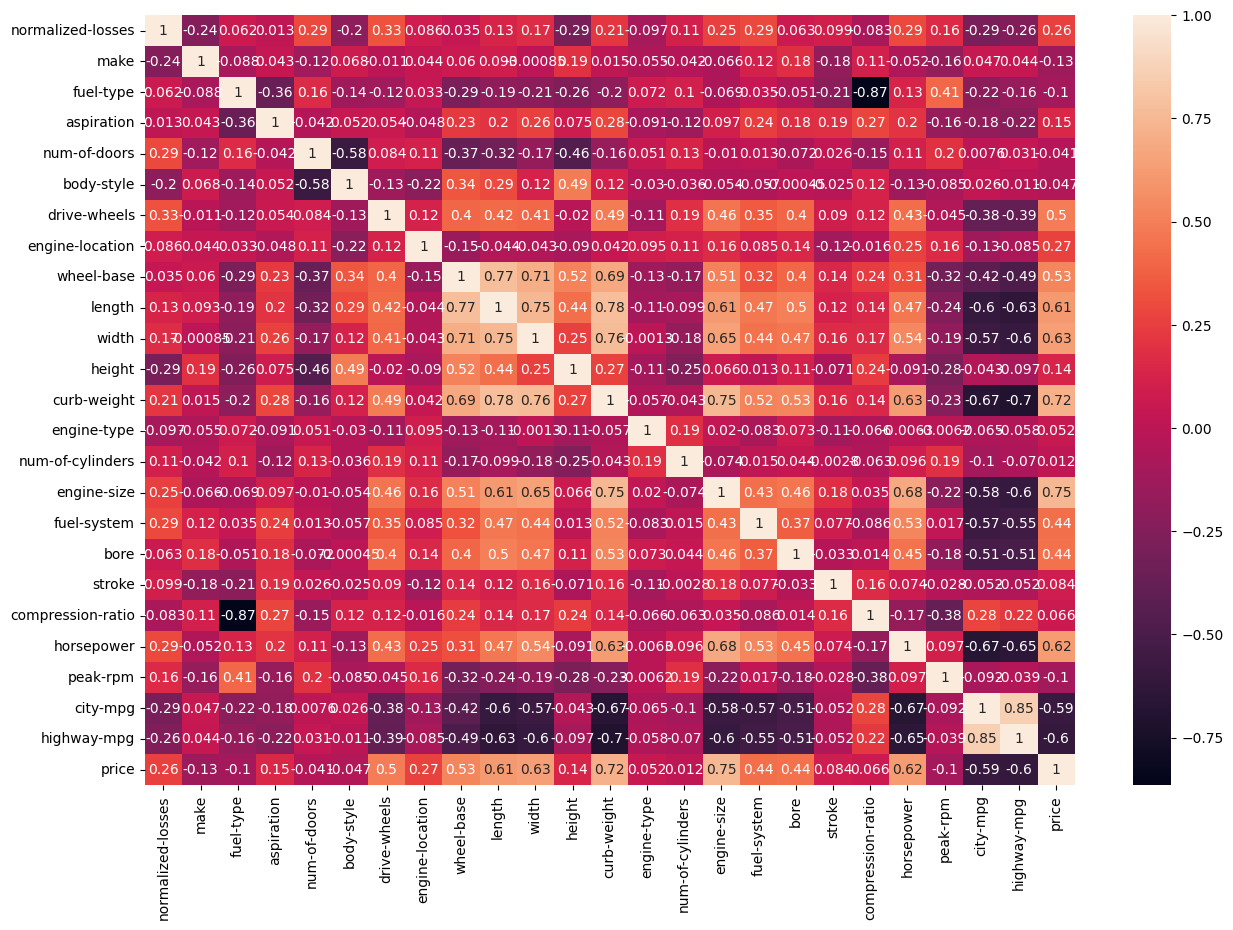

In [173]:
plt.figure(figsize=[15,10])
sns.heatmap(cars_price.corr(),annot=True)
plt.show()

2.3 Feature Scaling and Selection


20. Yes, features like horsepower and engine-size should typically be scaled. Here's why:

Magnitude differences: These features are likely to have large numerical values compared to other features (e.g., fuel-type, make). If not scaled, models like linear regression, k-nearest neighbors, or neural networks may give more importance to these larger values, leading to biased predictions.

21. Apply standardization or normalization to the necessary columns.


In [175]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Features to standardize (example: horsepower, engine-size)
columns_to_standardize = ['horsepower', 'engine-size']

cars_price[columns_to_standardize] = scaler.fit_transform(cars_price[columns_to_standardize])


In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Features to normalize
columns_to_normalize = ['horsepower', 'engine-size']

cars_price[columns_to_normalize] = scaler.fit_transform(cars_price[columns_to_normalize])

22. Select relevant features for modeling by checking their correlation with price.


In [174]:
# Calculate correlation matrix
correlation_matrix = cars_price.corr()

# Check the correlation of each feature with 'price'
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlation)


price                1.000000
engine-size          0.748315
curb-weight          0.717618
width                0.632224
horsepower           0.624042
length               0.611028
wheel-base           0.528206
drive-wheels         0.496026
bore                 0.439825
fuel-system          0.435208
engine-location      0.266793
normalized-losses    0.257964
aspiration           0.152128
height               0.136443
stroke               0.084054
compression-ratio    0.066002
engine-type          0.051514
num-of-cylinders     0.012304
num-of-doors        -0.040888
body-style          -0.047019
fuel-type           -0.102191
peak-rpm            -0.104562
make                -0.134583
city-mpg            -0.585033
highway-mpg         -0.604960
Name: price, dtype: float64


In [177]:
'''from google.colab import files
files.download('cars_price.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2.4 Splitting Data for Model Training


23. Split the dataset into training (80%) and testing (20%) sets.


In [178]:
X = cars_price.drop(['price'], axis=1)

y = cars_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [180]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20699, 24), (5175, 24), (20699,), (5175,))

24. Why is it important to keep a test set separate from training data?


A separate test set checks how well it performs on unseen data.
By using separate test we try to avoid overfitting and underfitting conditions and also helps us to check performance of the model.

**Section 3: Model Building**


3.1 Applying Regression Models


25. Train a Linear Regression model. Record the MSE and R2 Score.
26. Train a Decision Tree Regression model. Compare its performance with Linear
Regression.
27. Train a Random Forest Regression model. How does it improve results?


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - R² Score:", r2_lr)

Linear Regression - MSE: 16390424.322588779
Linear Regression - R² Score: 0.7061475212098088


In [182]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate MSE and R² Score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression - MSE:", mse_dt)
print("Decision Tree Regression - R² Score:", r2_dt)


Decision Tree Regression - MSE: 14693139.503926547
Decision Tree Regression - R² Score: 0.7365769561872483


In [183]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE and R² Score
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression - MSE:", mse_rf)
print("Random Forest Regression - R² Score:", r2_rf)


Random Forest Regression - MSE: 10056866.80363232
Random Forest Regression - R² Score: 0.8196974537726074


**3.2 Evaluating Model Performance**


28. Create a table comparing the performance of different models based on MSE and R2
Score.


In [184]:

performance_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'MSE': [16390424.32, 14693139.50, 10056866.80],
    'R2 Score': [0.7061, 0.7365, 0.8196]
}

performance_df = pd.DataFrame(performance_data)
print(performance_df.sort())


               Model          MSE  R2 Score
0  Linear Regression  16390424.32    0.7061
1      Decision Tree  14693139.50    0.7365
2      Random Forest  10056866.80    0.8196


29. Random Forest performed the best because it combines multiple decision trees (ensemble learning), reduces overfitting through averaging and captures non-linear relationships better than Linear Regression.

30. We can reduce overfitting by some of the techniques such as:
Cross-validation, Reduce model complexity, Ensemble methods and drop unwanted features.

**Section 4: Reporting & Insights**


31. What key insights did you gain from EDA about car prices?

Ans.Car price is positively correlated with features like engine-size, horsepower, and curb-weight e.g: bigger, more powerful cars tend to be more expensive. Also Luxury brands (like BMW or Mercedes) clearly have higher average prices.

32. Which features had the most impact on price prediction?

Ans. Engine-size, horsepower, curb-weight and make have higher impact on price predicitons as it shows high correlation with the target(price).





33. What challenges did you face during preprocessing and modeling?

Ans. There were a lot of challenges during preprocessing such as: duplicated value, missing values indicated with '?' and blank values, Mixed types like normalized-losses stored as strings instead of numbers due to invalid entries. The target variable was an Object datatype.

34. If given a larger dataset with more features, what additional steps would you take?

Ans. We need to automate handling of missing values and outliers, build new features (combine some features) like power-to-weight ratio, price per HP, etc, try advanced models: Gradient Boosting (XGBoost, LightGBM), SVR, or even deep learning for richer data,
use cross-validation and hyperparameter tuning (GridSearchCV/RandomizedSearchCV)


##                                                                                                                                                 **The End**